In [1]:
cd '~/work/pelops'

/Users/dgrossman/work/pelops


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#import time
import numpy as np
from pelops.datasets.featuredataset import FeatureDataset
from pelops.experiment_api.experiment import ExperimentGenerator
from pelops.datasets import chip
from pelops.models.makesvm import train_svm
from pelops.analysis.comparecameras import mad_matrix

In [3]:
ITEMSPERCAMERA = 2
NUMCAMERAS = 2
TRAIN_RANDOM=1024
DROPPED=0
TRAIN_FEATURES = '/Users/dgrossman/image_NEW_TRAIN'
EXAMPLES = 1000 

fd_train = FeatureDataset(TRAIN_FEATURES)
eg_train = ExperimentGenerator(fd_train, NUMCAMERAS, ITEMSPERCAMERA, DROPPED, TRAIN_RANDOM)


In [4]:
clf_train = train_svm(EXAMPLES,fd_train,eg_train)



fitting
fitting took 231.78848099708557 seconds


In [5]:
g_train,b_train = mad_matrix(EXAMPLES,clf_train,fd_train,eg_train,'cam')

In [6]:
ITEMSPERCAMERA = 2
NUMCAMERAS = 2
TEST_RANDOM=1024
DROPPED=0
TEST_FEATURES = '/Users/dgrossman/image_NEW_TEST'
EXAMPLES = 1000

fd_test = FeatureDataset(TEST_FEATURES)
eg_test = ExperimentGenerator(fd_test,  NUMCAMERAS, ITEMSPERCAMERA, DROPPED, TEST_RANDOM)

In [7]:
g_test,b_test = mad_matrix(EXAMPLES,clf_train,fd_test,eg_test,'cam')

In [8]:
allset = set()
for key in g_test.keys():
    l,r = key.split('|')
    allset.add(l)
    allset.add(r)
for key in b_test.keys():
    l,r = key.split('|')
    allset.add(l)
    allset.add(r)

In [9]:
len(allset)
s = (len(allset),len(allset))
names = [x for x in allset]
name2index = dict()
index2name = dict()
for index,item in enumerate(names):
    name2index[item] = index
    index2name[index] = item

In [10]:
matrix = np.zeros(s)

In [11]:
for carpcar in g_test.keys():
    n = g_test[carpcar]
    d = n
    if carpcar in b_test:
        d += b_test[carpcar]
    l,r = carpcar.split('|')
    matrix[name2index[l]][name2index[r]] = n / float(d)

In [12]:
counts = list()
spoo = list()

for i in index2name:
    counts.append(i)
    spoo.append(index2name[i])

([<matplotlib.axis.YTick at 0x10ed23cf8>,
 <a list of 15 Text yticklabel objects>)

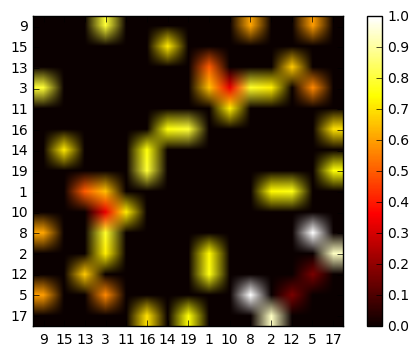

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(matrix,cmap='hot')
plt.colorbar()
plt.xticks(counts, spoo)
plt.yticks(counts,spoo)